In [1]:
#importing tools for anaylysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to read in the data
suicide_rates = pd.read_csv('..\data\master.csv')
causes_of_deaths = pd.read_csv('..\data/annual-number-of-deaths-by-cause.csv')
causesOfDeathsByPercentage = pd.read_csv('..\data\share-of-deaths-by-cause-2016.csv')

In [3]:
#a summary of data1
suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 1.9+ MB


In [4]:
#to see the column names of the data
causes_of_deaths.columns

Index(['Entity', 'Code', 'Year', 'Dementia', 'Cardiovascular diseases',
       'Kidney disease', 'Respiratory disease', 'Liver disease',
       'Diabetes, blood and endocrine disease', 'Digestive disease',
       'Hepatitis', 'Cancers', 'Parkinson's disease', 'Fire', 'Malaria',
       'Drowning', 'Homicide', 'HIV/AIDS', 'Drug disorder', 'Tuberculosis',
       'Road incidents', 'Maternal deaths', 'Neonatal deaths',
       'Alcohol disorder', 'Natural disasters', 'Diarrheal diseases',
       'Heat-related deaths (hot or cold exposure)',
       'Nutritional deficiencies', 'Suicide', 'Execution (deaths)',
       'Meningitis (deaths)', 'Lower respiratory infections (deaths)',
       'Intestinal infectious diseases (deaths)',
       'Protein-energy malnutrition (deaths)', 'Conflict (deaths)',
       'Terrorism (deaths)'],
      dtype='object')

In [5]:
causesOfDeathsByPercentage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 35 columns):
Entity                                      6156 non-null object
Code                                        5292 non-null object
Year                                        6156 non-null int64
Cardiovascular diseases (%)                 6156 non-null float64
Cancers (%)                                 6156 non-null float64
Respiratory diseases (%)                    6156 non-null float64
Diabetes (%)                                6156 non-null float64
Dementia (%)                                6156 non-null float64
Lower respiratory infections (%)            6156 non-null float64
Neonatal deaths (%)                         6156 non-null float64
Diarrheal diseases (%)                      6156 non-null float64
Road incidents (%)                          6156 non-null float64
Liver disease (%)                           6156 non-null float64
Tuberculosis (%)                       

In [6]:
#dropping columns that are not useful in this analysis
to_drop1 = ['country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']
suicide_rates.drop(columns=to_drop1, inplace=True)

In [7]:
#to view the first five rows of the data so to know if those columns have been dropped.
suicide_rates.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop
0,Albania,1987,male,15-24 years,21,312900,6.71
1,Albania,1987,male,35-54 years,16,308000,5.19
2,Albania,1987,female,15-24 years,14,289700,4.83
3,Albania,1987,male,75+ years,1,21800,4.59
4,Albania,1987,male,25-34 years,9,274300,3.28


In [8]:
to_drop3 = ['Code']
causesOfDeathsByPercentage.drop(columns = to_drop3, inplace=True)

In [9]:
causesOfDeathsByPercentage.head()

,Entity,Year,Cardiovascular diseases (%),Cancers (%),Respiratory diseases (%),Diabetes (%),Dementia (%),Lower respiratory infections (%),Neonatal deaths (%),Diarrheal diseases (%),...,Parkinson disease (%),Alcohol disorders (%),Intestinal infectious diseases (%),Drug disorders (%),Hepatitis (%),Fire (%),Heat-related (hot and cold exposure) (%),Natural disasters (%),Conflict (%),Terrorism (%)
0,Afghanistan,1990,17.610397,4.025975,2.106626,3.832555,0.531429,10.886362,9.184653,2.497141,...,0.025159,0.028998,0.183330,0.041205,0.138738,0.174157,0.137823,0.000000,0.932,0.007
1,Afghanistan,1991,17.801807,4.054145,2.134176,3.822228,0.532497,10.356968,8.938897,2.572228,...,0.025451,0.029172,0.178107,0.042033,0.135008,0.170671,0.134827,0.797603,2.044,0.040
2,Afghanistan,1992,18.386833,4.173959,2.208298,3.900125,0.540066,10.095546,8.841380,2.707743,...,0.026122,0.029973,0.176855,0.043843,0.134582,0.171171,0.139053,0.340210,2.408,0.027
3,Afghanistan,1993,18.959646,4.269233,2.283923,3.974113,0.553813,9.873841,8.676409,3.360793,...,0.027044,0.030456,0.173467,0.045350,0.133888,0.171032,0.150136,0.116263,NaN,NaN
4,Afghanistan,1994,19.089513,4.256034,2.307721,3.968954,0.550087,9.530242,8.384454,3.083801,...,0.027180,0.030103,0.165135,0.045744,0.130486,0.167263,0.148970,0.075506,4.296,0.010


In [10]:
#to view the minimum and maximum dates of suicide_rates
min_year=min(suicide_rates.year)
max_year=max(suicide_rates.year)
print('Min Year :',min_year)
print('Max Year :',max_year)

Min Year : 1985
Max Year : 2016


In [11]:
#to view the minimum and maximum dates of causes_of_deaths
min_year=min(causes_of_deaths.Year)
max_year=max(causes_of_deaths.Year)
print('Min Year :',min_year)
print('Max Year :',max_year)

Min Year : 1990
Max Year : 2016


In [12]:
#to view the minimum and maximum dates of causesOfDeathsByPercentage
min_year=min(causesOfDeathsByPercentage.Year)
max_year=max(causesOfDeathsByPercentage.Year)
print('Min Year :',min_year)
print('Max Year :',max_year)

Min Year : 1990
Max Year : 2016


In [13]:
#reducing the year in data1 to 1990 in other to have same year values with other data frame.
suicide_rates = suicide_rates[suicide_rates.year >= 1990]

In [14]:
#to view the values 'Year'
suicide_rates['year'].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 1990, 1991, 2012,
       2013, 2014, 2015, 2011, 2016], dtype=int64)

In [15]:
causes_of_deaths['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016], dtype=int64)

In [16]:
causesOfDeathsByPercentage['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016], dtype=int64)

In [17]:
#to know if there are any missing values in the dataset
suicide_rates.isnull()

,country,year,sex,age,suicides_no,population,suicides/100k pop
36,False,False,False,False,False,False,False
37,False,False,False,False,False,False,False
38,False,False,False,False,False,False,False
39,False,False,False,False,False,False,False
40,False,False,False,False,False,False,False
41,False,False,False,False,False,False,False
42,False,False,False,False,False,False,False
43,False,False,False,False,False,False,False
44,False,False,False,False,False,False,False
45,False,False,False,False,False,False,False


In [18]:
#to know if there are any missing values in the dataset
causes_of_deaths.isnull()

,Entity,Code,Year,Dementia,Cardiovascular diseases,Kidney disease,Respiratory disease,Liver disease,"Diabetes, blood and endocrine disease",Digestive disease,...,Heat-related deaths (hot or cold exposure),Nutritional deficiencies,Suicide,Execution (deaths),Meningitis (deaths),Lower respiratory infections (deaths),Intestinal infectious diseases (deaths),Protein-energy malnutrition (deaths),Conflict (deaths),Terrorism (deaths)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [19]:
#to know if there are any missing values in the dataset
causesOfDeathsByPercentage.isnull()

,Entity,Year,Cardiovascular diseases (%),Cancers (%),Respiratory diseases (%),Diabetes (%),Dementia (%),Lower respiratory infections (%),Neonatal deaths (%),Diarrheal diseases (%),...,Parkinson disease (%),Alcohol disorders (%),Intestinal infectious diseases (%),Drug disorders (%),Hepatitis (%),Fire (%),Heat-related (hot and cold exposure) (%),Natural disasters (%),Conflict (%),Terrorism (%)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
#renaming the column year to Year.
suicide_rates.rename(columns={'year':'Year'})

,country,Year,sex,age,suicides_no,population,suicides/100k pop
36,Albania,1992,male,35-54 years,12,343800,3.49
37,Albania,1992,male,15-24 years,9,263700,3.41
38,Albania,1992,male,55-74 years,5,159500,3.13
39,Albania,1992,male,25-34 years,7,245500,2.85
40,Albania,1992,female,15-24 years,7,292400,2.39
41,Albania,1992,female,25-34 years,4,267400,1.50
42,Albania,1992,female,35-54 years,2,323100,0.62
43,Albania,1992,female,55-74 years,1,164900,0.61
44,Albania,1992,female,5-14 years,0,336700,0.00
45,Albania,1992,female,75+ years,0,38700,0.00


In [21]:
#groping the data according to country and sexes so as to grasp an undertsanding of the data
suicide_rates.groupby(['country', 'sex', 'year', 'age','population', 'suicides/100k pop']).suicides_no.sum()

country     sex     year  age          population  suicides/100k pop
Albania     female  1992  15-24 years  292400      2.39                   7
                          25-34 years  267400      1.50                   4
                          35-54 years  323100      0.62                   2
                          5-14 years   336700      0.00                   0
                          55-74 years  164900      0.61                   1
                          75+ years    38700       0.00                   0
                    1993  15-24 years  285300      3.51                  10
                          25-34 years  261800      2.67                   7
                          35-54 years  331200      2.11                   7
                          5-14 years   340300      0.29                   1
                          55-74 years  169500      1.18                   2
                          75+ years    39300       0.00                   0
                   

In [22]:
print((suicide_rates[suicide_rates['sex'] == 'male']))

          country  year   sex          age  suicides_no  population  \
36        Albania  1992  male  35-54 years           12      343800   
37        Albania  1992  male  15-24 years            9      263700   
38        Albania  1992  male  55-74 years            5      159500   
39        Albania  1992  male  25-34 years            7      245500   
46        Albania  1992  male   5-14 years            0      362900   
47        Albania  1992  male    75+ years            0       23900   
48        Albania  1993  male  15-24 years           18      243300   
49        Albania  1993  male  55-74 years            7      165000   
50        Albania  1993  male    75+ years            1       24200   
51        Albania  1993  male  25-34 years            9      230100   
53        Albania  1993  male  35-54 years           10      350300   
58        Albania  1993  male   5-14 years            1      367000   
60        Albania  1994  male    75+ years            2       24600   
61    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text xticklabel objects>)

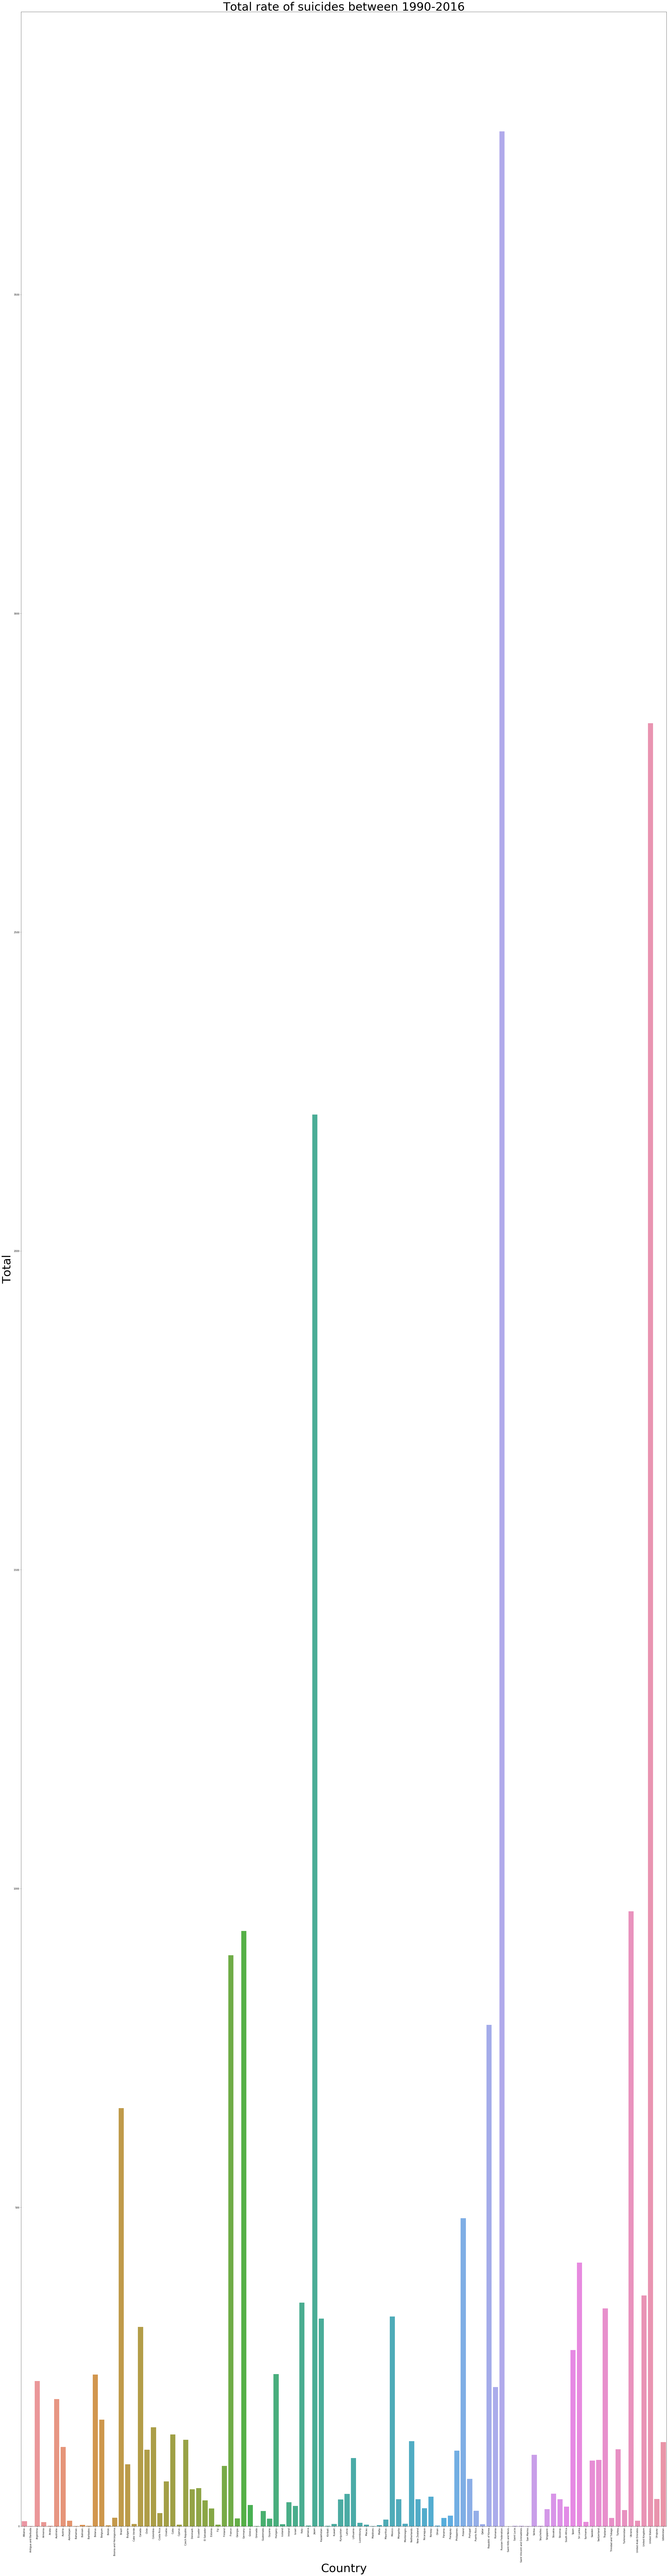

In [23]:
#to view the country with the highest suicide rate
plt.figure(figsize=(50, 200))
visual = sns.barplot(x = 'country', y = 'suicides_no', data = suicide_rates, ci = None)
visual.set_title('Total rate of suicides between 1990-2016', {'fontsize': 50})
visual.set_xlabel('Country', {'fontsize': 50})
visual.set_ylabel('Total', {'fontsize': 50})
plt.rc('xtick',labelsize=20)
plt.xticks(rotation= 90)
# from the graph, it can be seen that Russian has the highest suicide rate followed by the United states.
#One will be tempted to say these have the highest suicide rates.We will now consider the population of the people.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text xticklabel objects>)

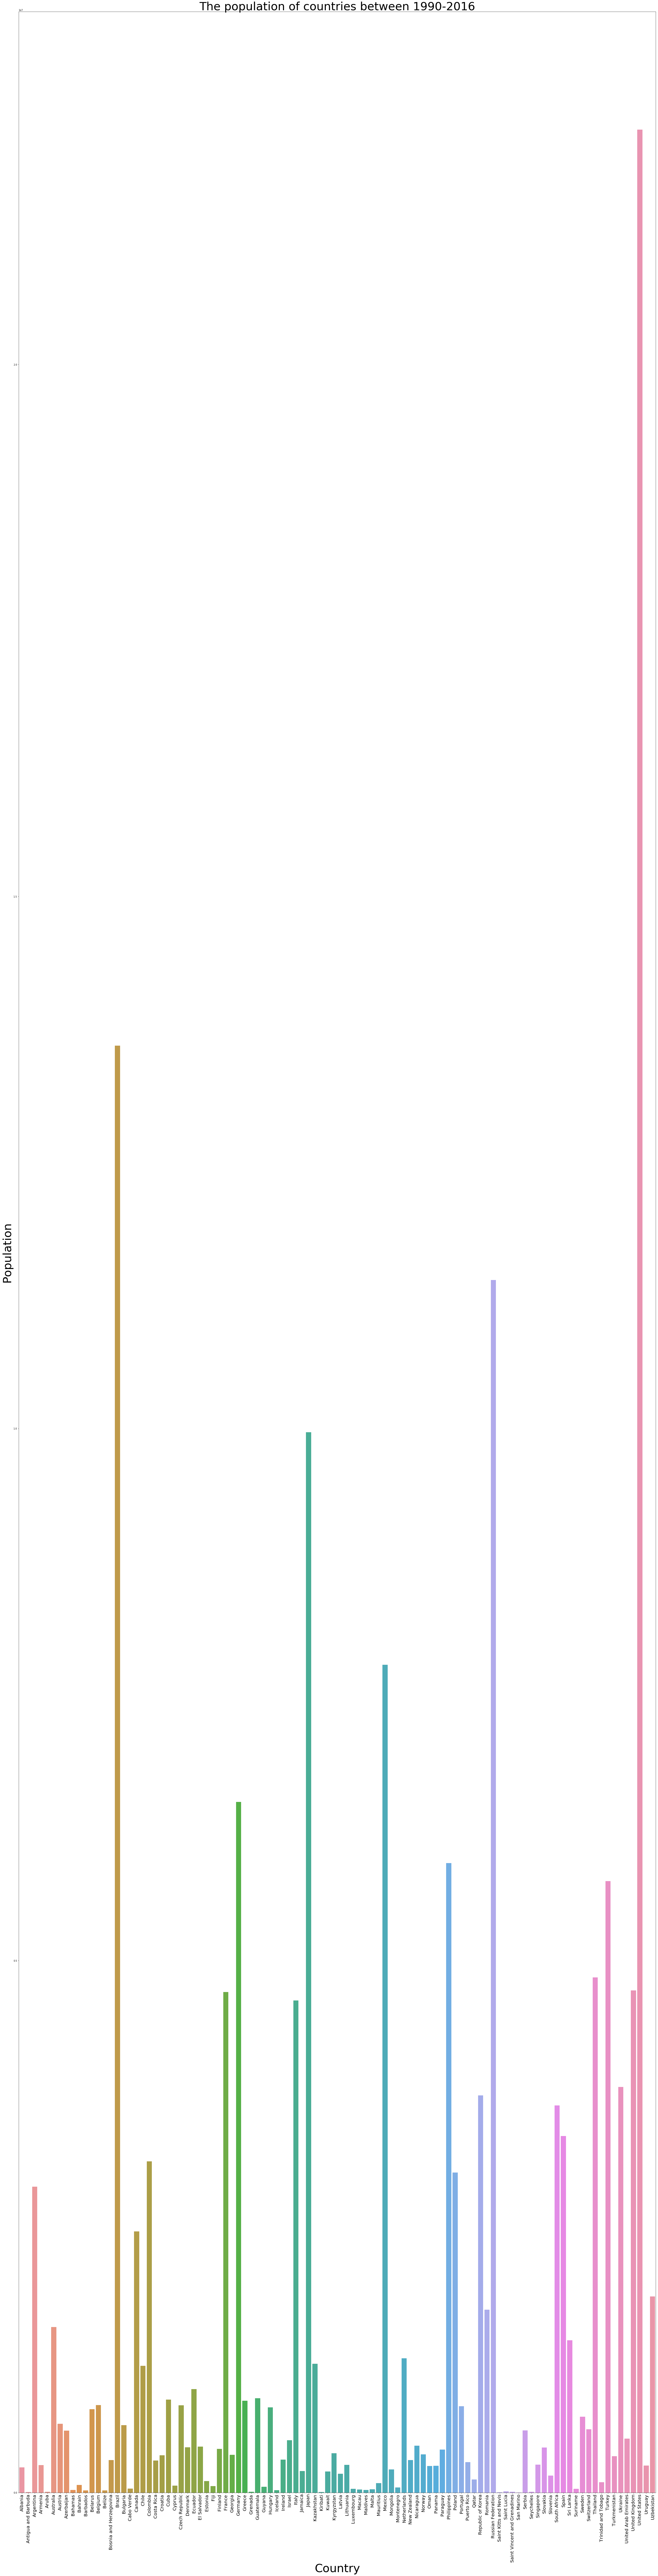

In [24]:
#to view the population of countries
plt.figure(figsize=(50, 200))
visual = sns.barplot(x = 'country', y = 'population', data = suicide_rates, ci = None)
visual.set_title('The population of countries between 1990-2016', {'fontsize': 50})
visual.set_xlabel('Country', {'fontsize': 50})
visual.set_ylabel('Population', {'fontsize': 50})
plt.rc('xtick',labelsize=20)
plt.xticks(rotation= 90)
#The population still shows Russian with the highest population. To give an accurate meaning of suicide rates,
#we will conisder the suicide rates out of every 1000 people to accurately define suicide rates.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text xticklabel objects>)

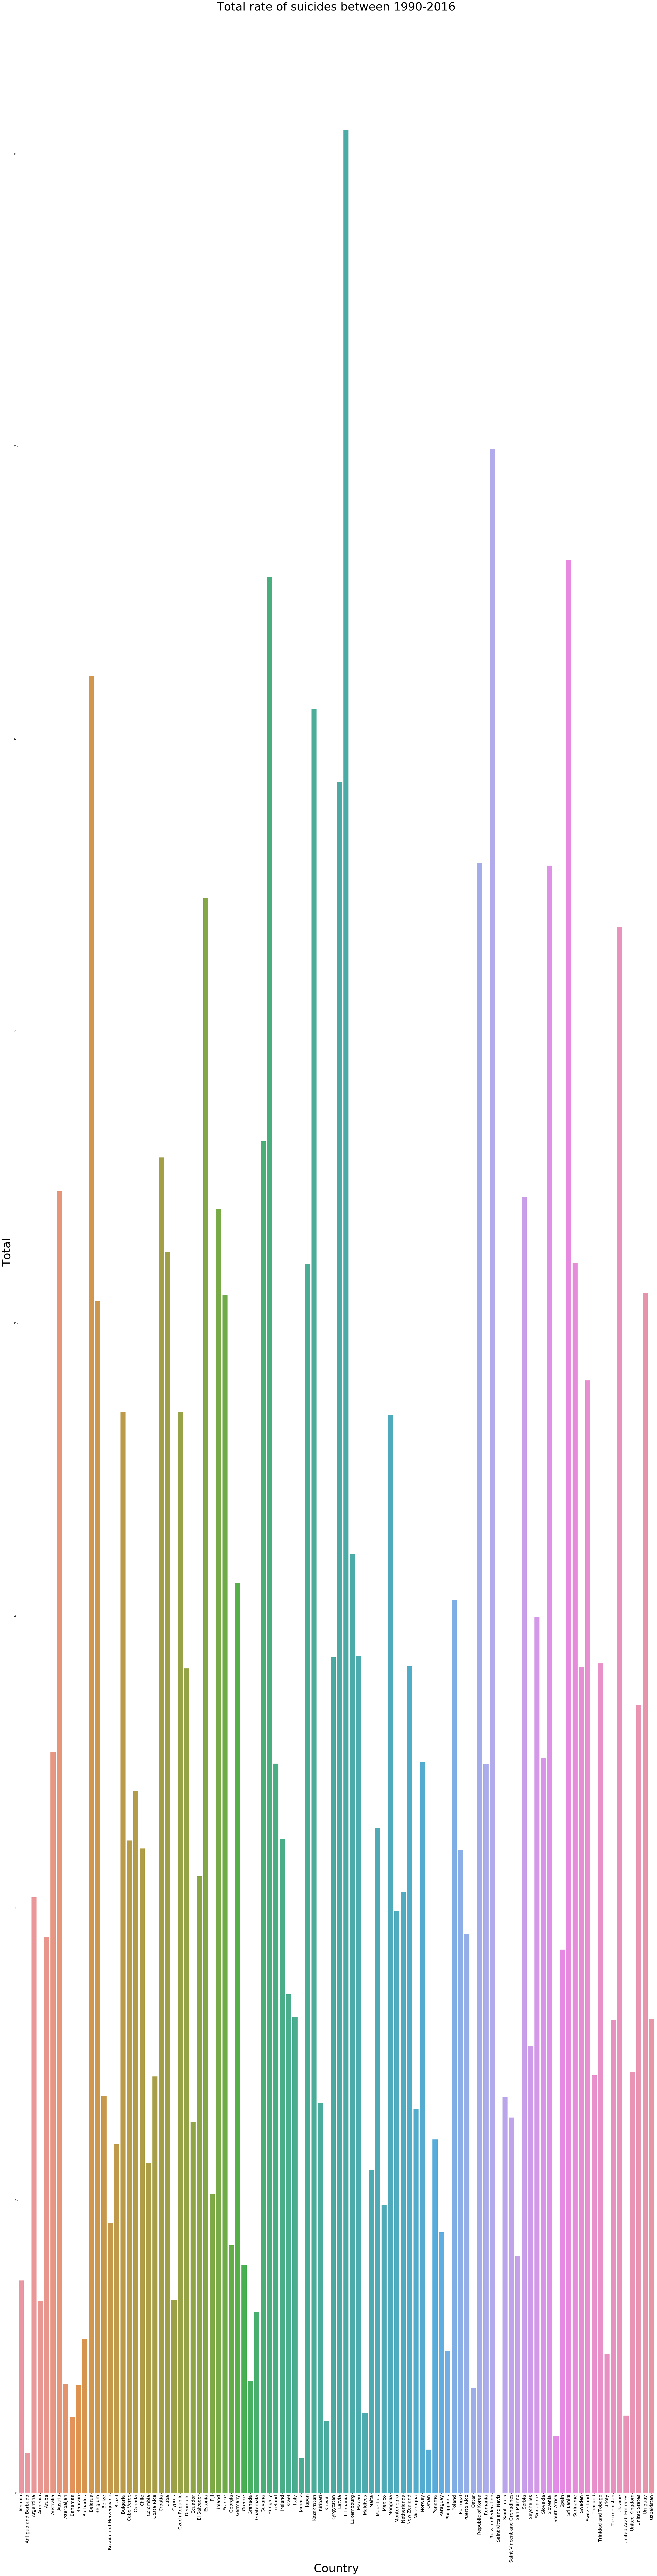

In [25]:
#to view the country with the highest suicide rate
plt.figure(figsize=(50, 200))
visual = sns.barplot(x = 'country', y = 'suicides/100k pop', data = suicide_rates, ci = None)
visual.set_title('Total rate of suicides between 1990-2016', {'fontsize': 50})
visual.set_xlabel('Country', {'fontsize': 50})
visual.set_ylabel('Total', {'fontsize': 50})
plt.rc('xtick',labelsize=20)
plt.xticks(rotation= 90)
#From the graph it can be accurately interepreted that Lithuania has the highest suicide rate.

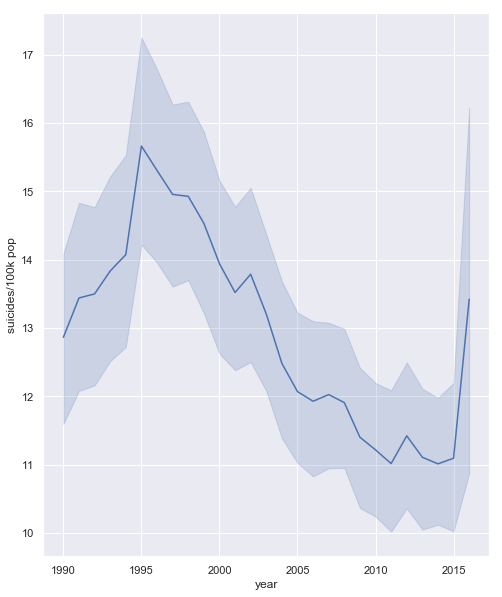

In [50]:
#to view the trend of suicide over time
plt.figure(figsize=(8, 10))
visual4 = sns.lineplot(x= 'year',y= 'suicides/100k pop', data = suicide_rates)
visual4.set_title('The population of countries between 1990-2016', {'fontsize': 50})
#from the graph it can be interpreted that suicide rate was high as at 1995. It started decreasing until 2015 when suicide rate
#started increasing.

Text(55.19999999999999, 0.5, 'Suicides/100k pop')

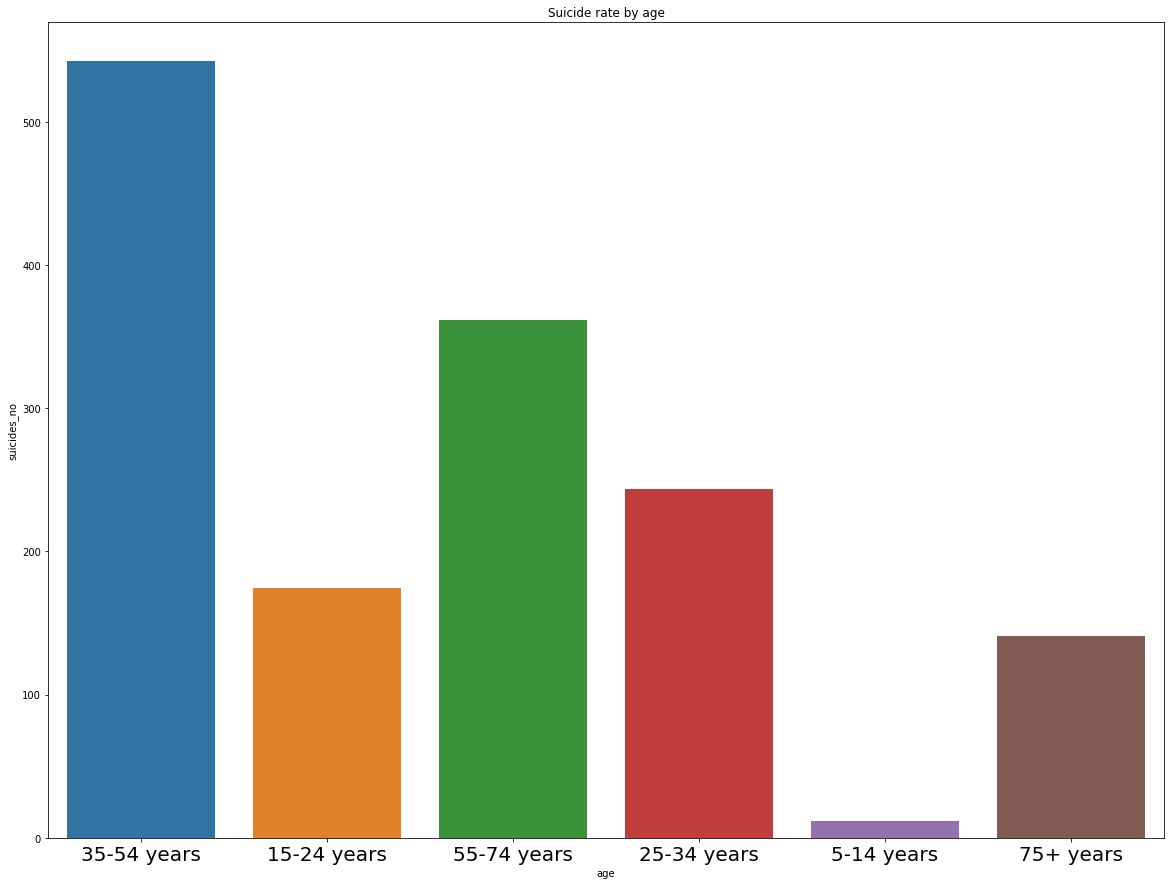

In [26]:
#to view suicide rate by age
plt.figure(figsize=(20,15))
visual2 = sns.barplot(x='age', y='suicides_no', data=suicide_rates, ci = None);
visual2.set_title('Suicide rate by age')
visual.set_xlabel('Age -groups',{'fontsize': 50})
visual.set_ylabel('Suicides/100k pop', {'fontsize':50})
#from the graph, it can be seen that suicide is common among ages 35- 54 years

Text(55.19999999999999, 0.5, 'Suicide rate')

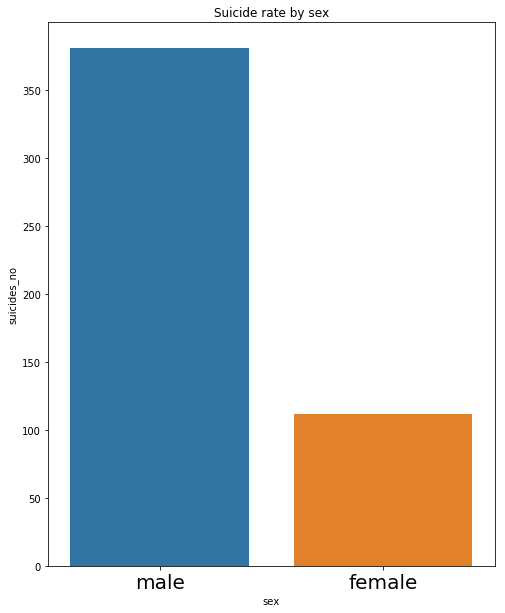

In [27]:
#to view suicide rate by sex
plt.figure(figsize=(8,10))
figure = sns.barplot(x='sex', y='suicides_no', data=suicide_rates, ci = None);
figure.set_title('Suicide rate by sex')
visual.set_xlabel('Sex', {'fontsize': 50})
visual.set_ylabel('Suicide rate', {'fontsize': 50})
#Males are more suicidal than females

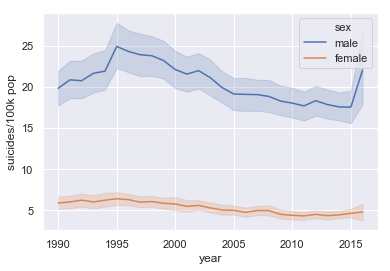

In [54]:
visual5 = sns.lineplot(x= 'year',y= 'suicides/100k pop', hue = 'sex', data = suicide_rates)

Text(55.19999999999999, 0.5, 'Total')

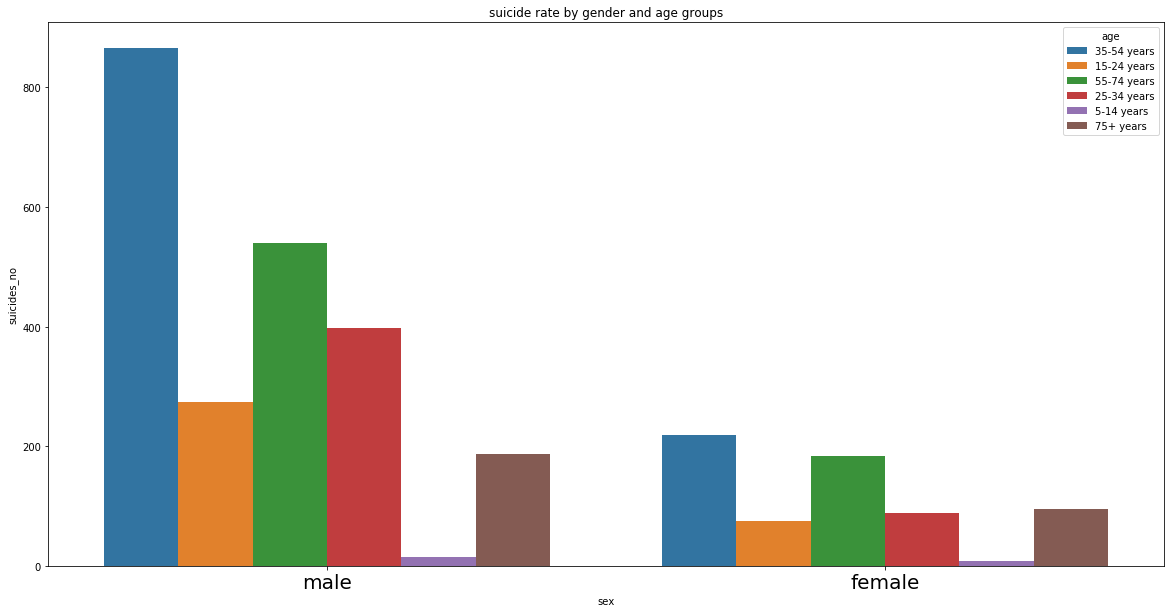

In [28]:
#to view suicde rate by age and sex
plt.figure(figsize=(20,10))
figure2 = sns.barplot(data=suicide_rates,x='sex',y='suicides_no',hue='age', ci = None);
figure2.set_title('suicide rate by gender and age groups')
visual.set_xlabel('Suicide rate by gender and age groups', {'fontsize': 50})
visual.set_ylabel('Total', {'fontsize': 50})
#from the graph, it can be seen that among the males, the age range between 35-54 years 
#are more suicidal and same also for the females

In [29]:
causes_of_deaths.head()

,Entity,Code,Year,Dementia,Cardiovascular diseases,Kidney disease,Respiratory disease,Liver disease,"Diabetes, blood and endocrine disease",Digestive disease,...,Heat-related deaths (hot or cold exposure),Nutritional deficiencies,Suicide,Execution (deaths),Meningitis (deaths),Lower respiratory infections (deaths),Intestinal infectious diseases (deaths),Protein-energy malnutrition (deaths),Conflict (deaths),Terrorism (deaths)
0,Afghanistan,AFG,1990,856.0,28372.0,2708.0,3394.0,1349.0,6177.0,1708.0,...,222.0,567.0,703.0,NaN,4927.029764,17650.382092,295.382207,534.008349,1508.0,12.0
1,Afghanistan,AFG,1991,908.0,30368.0,2851.0,3641.0,1443.0,6522.0,1792.0,...,230.0,588.0,754.0,NaN,4984.708427,17775.943869,303.866598,552.195285,3498.0,68.0
2,Afghanistan,AFG,1992,970.0,33035.0,3057.0,3967.0,1572.0,7009.0,1911.0,...,250.0,623.0,820.0,NaN,5135.647154,18244.558078,317.750121,583.667598,4341.0,49.0
3,Afghanistan,AFG,1993,1066.0,36512.0,3329.0,4398.0,1735.0,7655.0,2071.0,...,289.0,674.0,894.0,NaN,5385.702932,19122.639823,333.978331,630.198194,NaN,NaN
4,Afghanistan,AFG,1994,1161.0,40285.0,3641.0,4870.0,1911.0,8377.0,2243.0,...,315.0,731.0,977.0,NaN,5684.527486,20221.478296,348.419085,681.506962,9090.0,22.0


In [51]:
causes_of_deaths.groupby(['Year', 'Dementia', 'Cardiovascular diseases',
       'Kidney disease', 'Respiratory disease', 'Liver disease',
       'Diabetes, blood and endocrine disease', 'Digestive disease',
       'Hepatitis', 'Cancers', "Parkinson's disease", 'Fire', 'Malaria',
       'Drowning', 'Homicide', 'HIV/AIDS', 'Drug disorder', 'Tuberculosis',
       'Road incidents', 'Maternal deaths', 'Neonatal deaths',
       'Alcohol disorder', 'Natural disasters', 'Diarrheal diseases',
       'Heat-related deaths (hot or cold exposure)',
       'Nutritional deficiencies', 'Suicide', 'Execution (deaths)',
       'Meningitis (deaths)', 'Lower respiratory infections (deaths)',
       'Intestinal infectious diseases (deaths)',
       'Protein-energy malnutrition (deaths)', 'Conflict (deaths)',
       'Terrorism (deaths)']).sum()

Entity  \
Year Dementia Cardiovascular diseases Kidney disease Respiratory disease Liver disease Diabetes, blood and endocrine disease Digestive disease Hepatitis Cancers   Parkinson's disease Fire    Malaria  Drowning Homicide HIV/AIDS Drug disorder Tuberculosis Road incidents Maternal deaths Neonatal deaths Alcohol disorder Natural disasters Diarrheal diseases Heat-related deaths (hot or cold exposure) Nutritional deficiencies Suicide  Execution (deaths) Meningitis (deaths) Lower respiratory infections (deaths) Intestinal infectious diseases (deaths) Protein-energy malnutrition (deaths) Conflict (deaths) Terrorism (deaths)                         
2007 75.0     649.0                   32.0           91.0                106.0         173.0                                 98.0              9.0       385.0     4.0                 23.0    1022.0   47.0     27.0     1445.0   5.0           239.0        142.0          74.0            379.0           9.0              0.0               96.0               2.0                                        112.0                    39.0     3                  77.938581           381.728685                            4.002460                                93.804425                            0.0               0.0                    Equatorial Guinea   
     78.0     1282.0                  100.0          196.0               177.0         354.0                                 181.0             28.0      703.0     6.0                 47.0    363.0    71.0     21.0     898.0    9.0           465.0        156.0          265.0           1493.0          7.0              0.0               850.0              10.0                                       347.0                    51.0     0                  348.273013          1140.252201                           37.793542                               331.239313                           16.0              0.0                               Gambia   
     81.0     797.0                   108.0          111.0               53.0          555.0                                 56.0              11.0      390.0     7.0                 9.0     0.0      12.0     21.0     13.0     11.0          12.0         160.0          5.0             56.0            6.0              0.0               8.0                2.0                                        4.0                      85.0     0                  5.866822            75.719079                             3.276932                                3.376716                             0.0               0.0                              Bahrain   
     135.0    2589.0                  189.0          594.0               169.0         1138.0                                236.0             9.0       1248.0    10.0                87.0    20.0     79.0     286.0    15757.0  47.0          1069.0       472.0          88.0            642.0           34.0             0.0               760.0              21.0                                       95.0                     315.0    1                  88.471434           1006.943875                           0.536191                                84.053301                            0.0               0.0                             Botswana   
     158.0    2094.0                  183.0          114.0               110.0         420.0                                 53.0              6.0       704.0     15.0                31.0    0.0      23.0     42.0     6.0      19.0          28.0         486.0          4.0             191.0           5.0              0.0               6.0                2.0                                        1.0                      81.0     1                  11.348575           217.790350                            8.554370                                0.266688                             12.0              0.0                               Kuwait   
     159.0    3751.0                  458.0          611.0               170.0         975.0          

<Figure size 3600x14400 with 0 Axes>

Text(0.5, 1.0, 'Causes of death')

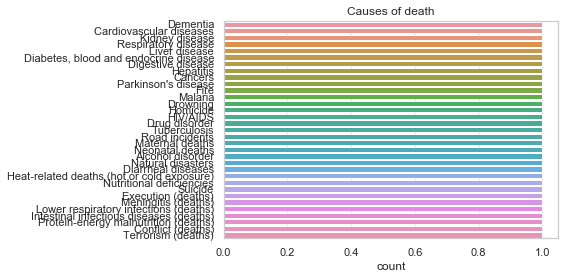

In [41]:
#a graph showing the variations in the different causes of deaths
plt.figure(figsize=(50,200))
columns=['Dementia', 'Cardiovascular diseases',
       'Kidney disease', 'Respiratory disease', 'Liver disease',
       'Diabetes, blood and endocrine disease', 'Digestive disease',
       'Hepatitis', 'Cancers', "Parkinson's disease", 'Fire', 'Malaria',
       'Drowning', 'Homicide', 'HIV/AIDS', 'Drug disorder', 'Tuberculosis',
       'Road incidents', 'Maternal deaths', 'Neonatal deaths',
       'Alcohol disorder', 'Natural disasters', 'Diarrheal diseases',
       'Heat-related deaths (hot or cold exposure)',
       'Nutritional deficiencies', 'Suicide', 'Execution (deaths)',
       'Meningitis (deaths)', 'Lower respiratory infections (deaths)',
       'Intestinal infectious diseases (deaths)',
       'Protein-energy malnutrition (deaths)', 'Conflict (deaths)',
       'Terrorism (deaths)']

plt.show()
sns.set(style="whitegrid")
sns.countplot(y = columns).set_title('Causes of death')

In [35]:
causesOfDeathsByPercentage.columns

Index(['Entity', 'Year', 'Cardiovascular diseases (%)', 'Cancers (%)',
       'Respiratory diseases (%)', 'Diabetes (%)', 'Dementia (%)',
       'Lower respiratory infections (%)', 'Neonatal deaths (%)',
       'Diarrheal diseases (%)', 'Road incidents (%)', 'Liver disease (%)',
       'Tuberculosis (%)', 'Kidney disease (%)', 'Digestive diseases (%)',
       'HIV/AIDS (%)', 'Suicide (%)', 'Malaria (%)', 'Homicide (%)',
       'Nutritional deficiencies (%)', 'Meningitis (%)',
       'Protein-energy malnutrition (%)', 'Drowning (%)',
       'Maternal deaths (%)', 'Parkinson disease (%)', 'Alcohol disorders (%)',
       'Intestinal infectious diseases (%)', 'Drug disorders (%)',
       'Hepatitis (%)', 'Fire (%)', 'Heat-related (hot and cold exposure) (%)',
       'Natural disasters (%)', 'Conflict (%)', 'Terrorism (%)'],
      dtype='object')

<Figure size 3600x7200 with 0 Axes>

Text(0.5, 1.0, 'Causes of deaths by percentage(%)')

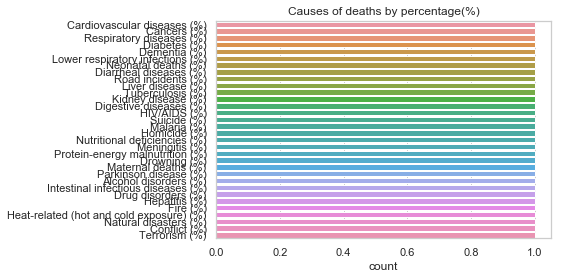

In [42]:
plt.figure(figsize=(50,100))
g=['Cardiovascular diseases (%)', 'Cancers (%)',
       'Respiratory diseases (%)', 'Diabetes (%)', 'Dementia (%)',
       'Lower respiratory infections (%)', 'Neonatal deaths (%)',
       'Diarrheal diseases (%)', 'Road incidents (%)', 'Liver disease (%)',
       'Tuberculosis (%)', 'Kidney disease (%)', 'Digestive diseases (%)',
       'HIV/AIDS (%)', 'Suicide (%)', 'Malaria (%)', 'Homicide (%)',
       'Nutritional deficiencies (%)', 'Meningitis (%)',
       'Protein-energy malnutrition (%)', 'Drowning (%)',
       'Maternal deaths (%)', 'Parkinson disease (%)', 'Alcohol disorders (%)',
       'Intestinal infectious diseases (%)', 'Drug disorders (%)',
       'Hepatitis (%)', 'Fire (%)', 'Heat-related (hot and cold exposure) (%)',
       'Natural disasters (%)', 'Conflict (%)', 'Terrorism (%)']

plt.show()
sns.set(style="whitegrid")
sns.countplot(y = g).set_title('Causes of deaths by percentage(%)')

Ealier this year, I was so overwhelmed with worry that I went to a secluded place to cry. I wept profusely that I attracted the attention of people around. They came to console me and said they were scared that I was contemplating suicide. Suicide? I asked it got me laughing. Why will I commit suicide? I was wondering. Nevertheless, suicide has been identiifed as one the causes of death. Cambridge English Dictionary defined suicide as the act of killing oneself intentionally. Just recently, Az daily news reported that Issac Kappy an American actor commited suicide on May 13, 2019 in Bellemont, Arizona, USA. 